In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os # Import the os module
import shutil # Import the shutil module

output_folder = "/content/IEMOCAP_full_release"  # Absolute path

#print(output_file)
os.makedirs(output_folder, exist_ok=True) # Now 'os' is recognized
for filename in os.listdir(output_folder):
  file_path = os.path.join(output_folder, filename)
  try:
      if os.path.isfile(file_path) or os.path.islink(file_path):
          os.unlink(file_path)  # Remove files or symbolic links
      elif os.path.isdir(file_path):
          shutil.rmtree(file_path)  # Remove subdirectories #Now shutil is recognized
  except Exception as e:
      print(f"Failed to delete {file_path}. Reason: {e}")

In [3]:
!cp '/content/drive/MyDrive/Emotion detection project/Imocap/IMOCAP/Copy of IEMOCAP_full_release_withoutVideos.tar.gz' /content/


In [4]:
!tar -xzvf '/content/Copy of IEMOCAP_full_release_withoutVideos.tar.gz' -C /content/


Streaming output truncated to the last 5000 lines.
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M030.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M021.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F007.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F003.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M033.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F013.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F022.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M012.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M016.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses0

In [5]:
!ls /content/

'Copy of IEMOCAP_full_release_withoutVideos.tar.gz'   drive   IEMOCAP_full_release   sample_data


In [6]:
import pandas as pd

# Load the CSV file
file_path = "/content/drive/MyDrive/Emotion detection project/Imocap/iemocap_full_dataset.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Select only the 'path' and 'emotion' columns
filtered_df = df[['path', 'emotion']]

# Save the filtered dataset to a new CSV file (optional)
filtered_df.to_csv("filtered_dataset.csv", index=False)

# Print the first few rows to confirm
print(filtered_df.head())


                                                path emotion
0  Session1/sentences/wav/Ses01F_script02_1/Ses01...     neu
1  Session1/sentences/wav/Ses01F_script02_1/Ses01...     fru
2  Session1/sentences/wav/Ses01F_script02_1/Ses01...     xxx
3  Session1/sentences/wav/Ses01F_script02_1/Ses01...     sur
4  Session1/sentences/wav/Ses01F_script02_1/Ses01...     neu


In [7]:
filtered_df['path'] = filtered_df['path'].apply(lambda x: f"/content/IEMOCAP_full_release/{x}")

# Display updated DataFrame
filtered_df.head()

<ipython-input-7-08a5e3fd72cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['path'] = filtered_df['path'].apply(lambda x: f"/content/IEMOCAP_full_release/{x}")


,path,emotion
0,/content/IEMOCAP_full_release/Session1/sentenc...,neu
1,/content/IEMOCAP_full_release/Session1/sentenc...,fru
2,/content/IEMOCAP_full_release/Session1/sentenc...,xxx
3,/content/IEMOCAP_full_release/Session1/sentenc...,sur
4,/content/IEMOCAP_full_release/Session1/sentenc...,neu


In [8]:
print(filtered_df["emotion"].value_counts())

emotion
xxx    2507
fru    1849
neu    1708
ang    1103
sad    1084
exc    1041
hap     595
sur     107
fea      40
oth       3
dis       2
Name: count, dtype: int64


In [9]:
from sklearn.utils import resample

# Step 1: Drop rows where "emotion" is "xxx" or "oth"
filtered_df = filtered_df[~filtered_df["emotion"].isin(["xxx", "oth"])]


In [10]:
print(max(filtered_df["emotion"].value_counts()))

1849


In [11]:
print(filtered_df["emotion"].value_counts())

emotion
fru    1849
neu    1708
ang    1103
sad    1084
exc    1041
hap     595
sur     107
fea      40
dis       2
Name: count, dtype: int64


In [12]:
import pandas as pd



# Calculate the counts for each emotion
emotion_counts = filtered_df['emotion'].value_counts()

# Find the maximum count
max_count = emotion_counts.max()

# Balance the dataset
balanced_data = []

for emotion, count in emotion_counts.items():
    # Filter rows for the current emotion
    emotion_rows = filtered_df[filtered_df['emotion'] == emotion]

    # Oversample rows to reach the max_count
    oversampled_rows = emotion_rows.sample(max_count, replace=True, random_state=42)

    # Append to the balanced dataset
    balanced_data.append(oversampled_rows)

# Concatenate all oversampled data into a single DataFrame
filtered_df = pd.concat(balanced_data, ignore_index=True)

# Check the result
print(filtered_df['emotion'].value_counts())



emotion
fru    1849
neu    1849
ang    1849
sad    1849
exc    1849
hap    1849
sur    1849
fea    1849
dis    1849
Name: count, dtype: int64


In [13]:
# filtered_df = df_balanced[~df_balanced["emotion"].isin(["neu"])]

In [14]:
!pip install librosa matplotlib #Install librosa if you haven't already
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Import the pyplot module from matplotlib
from IPython.display import Audio, display



def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

def ana_emotion(emotion:str, df:pd.DataFrame):
    path=np.array(df['path'][df['emotion']==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    display(Audio(path))

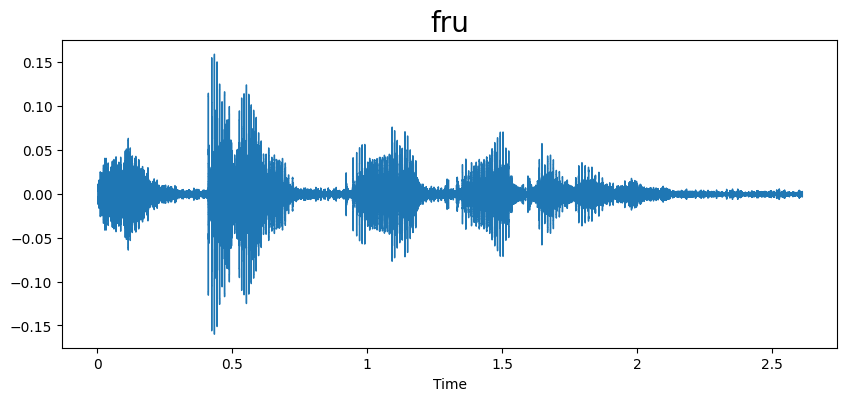

None

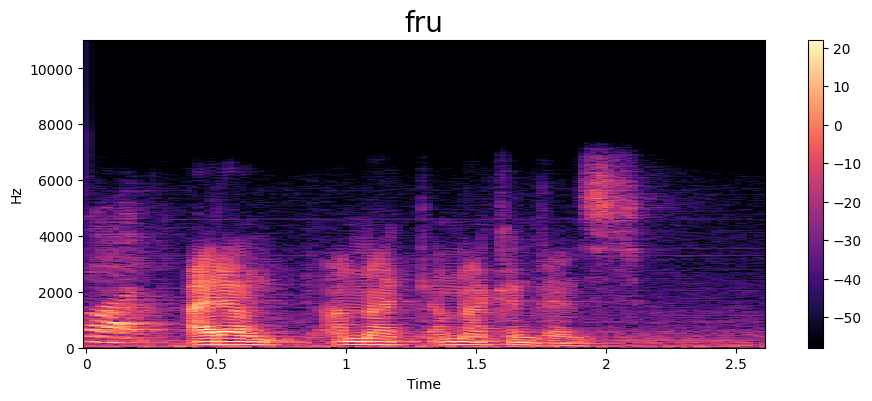

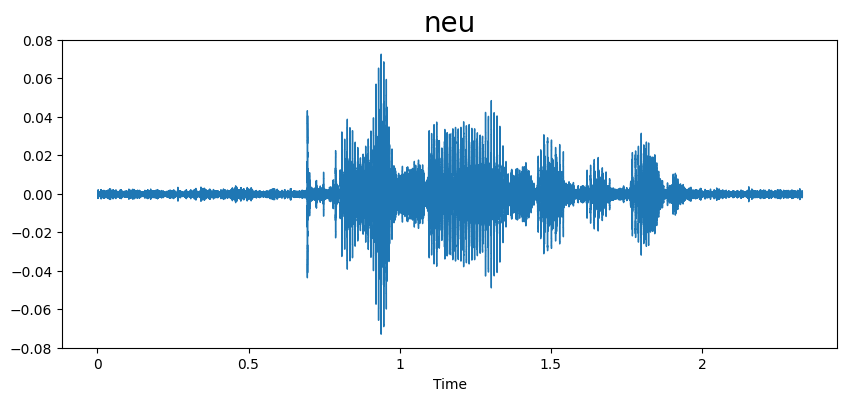

None

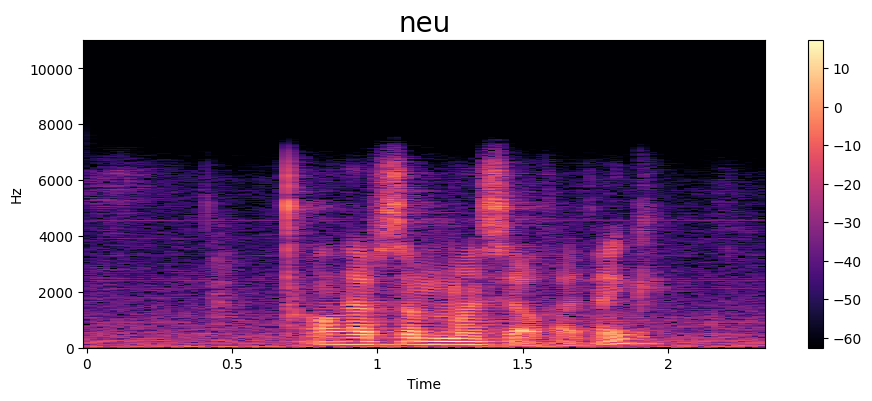

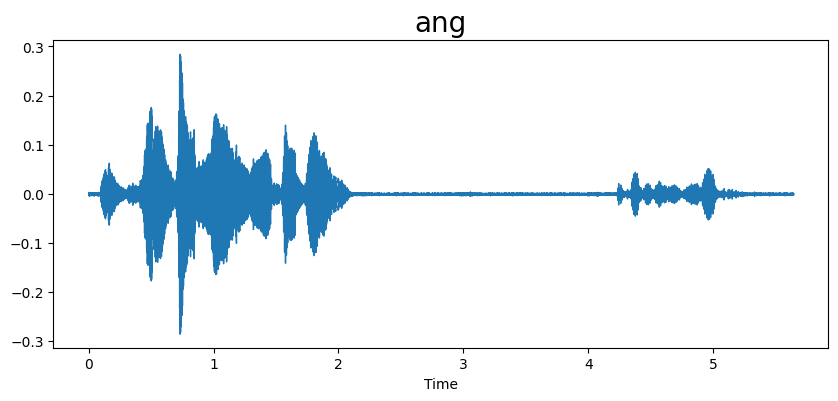

None

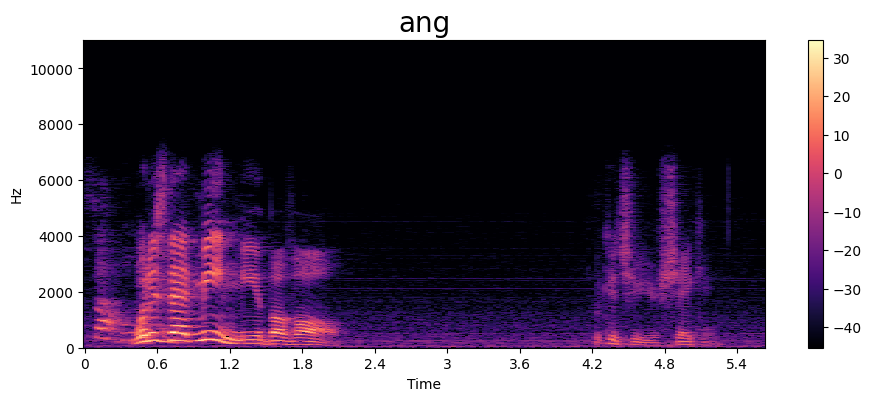

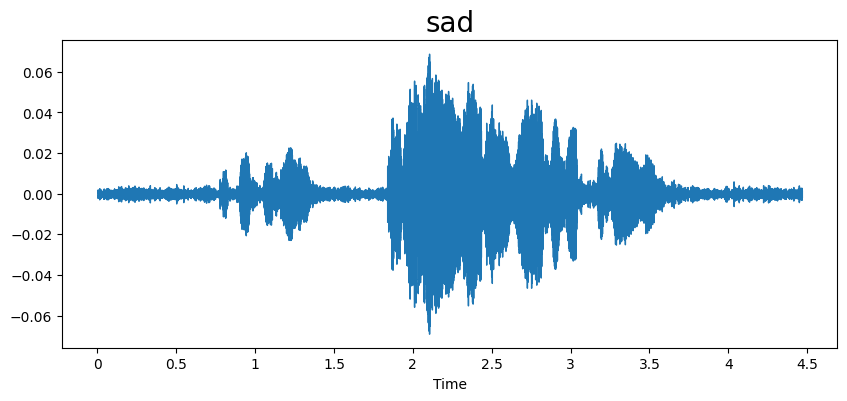

None

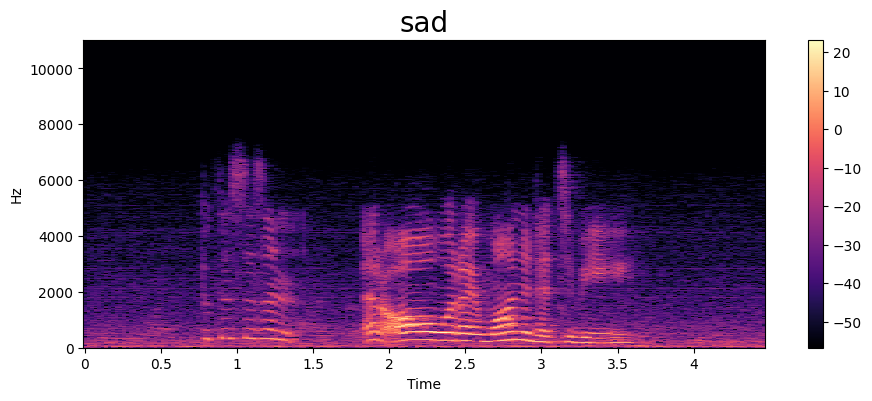

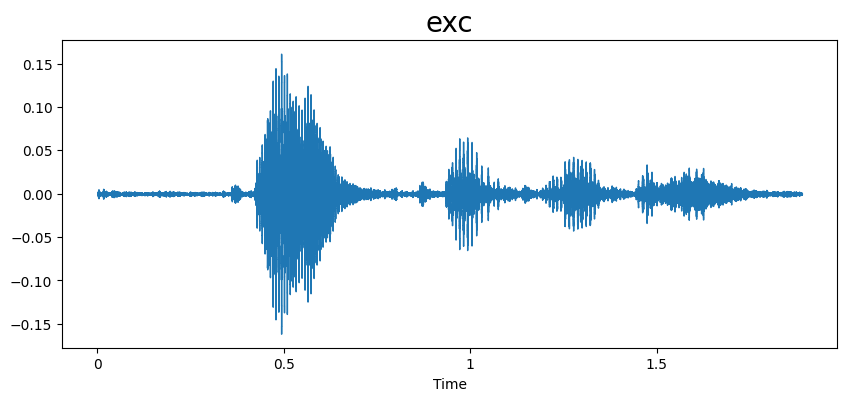

None

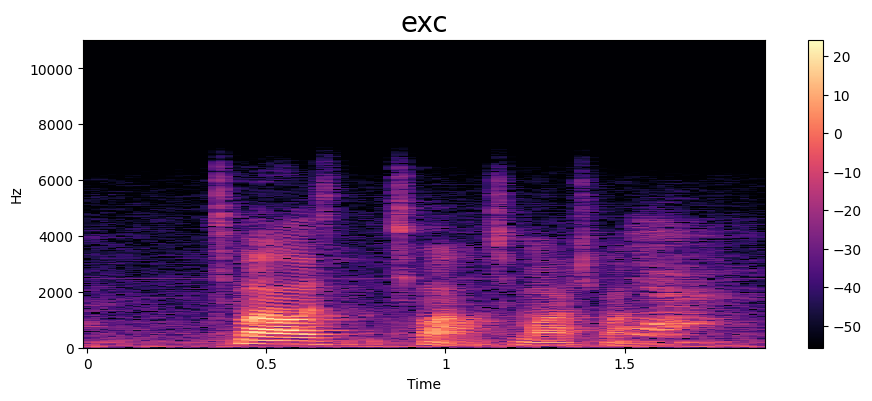

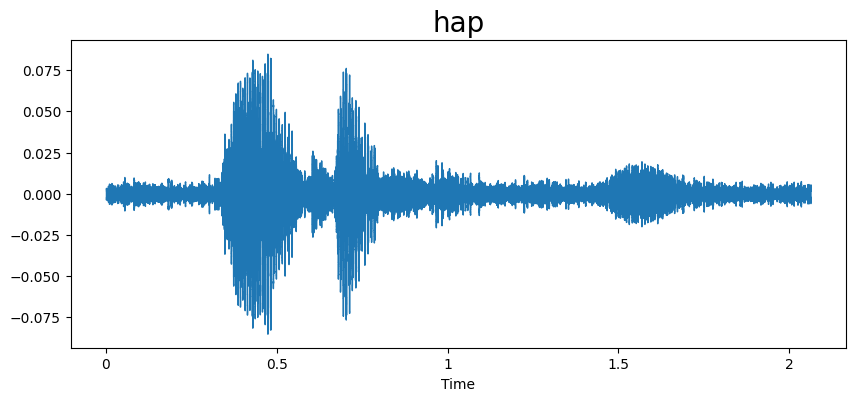

None

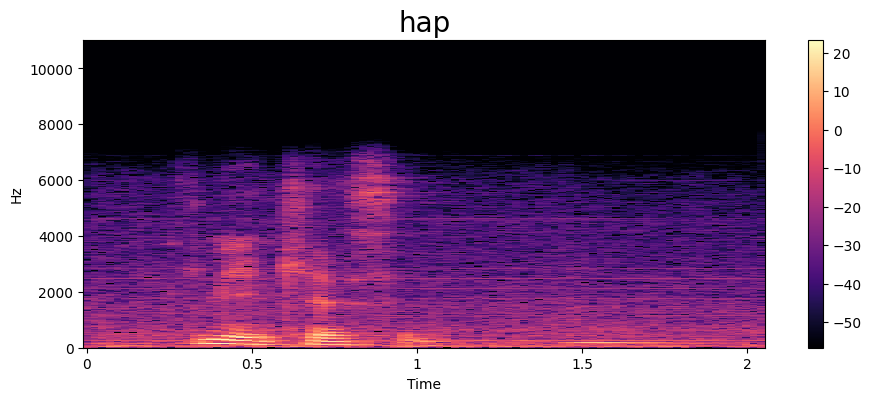

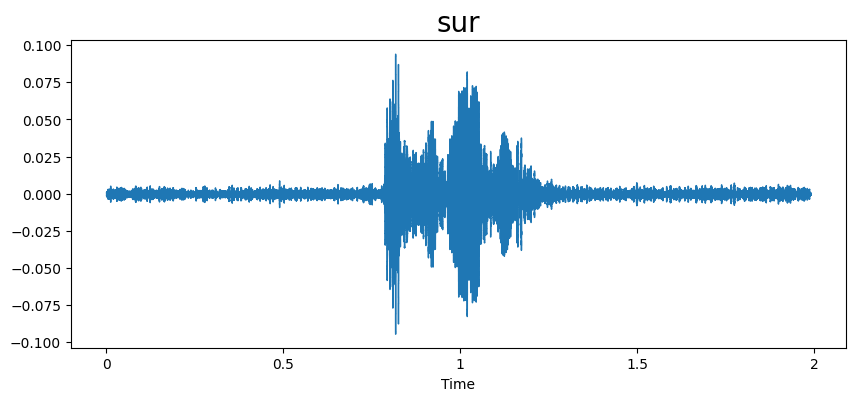

None

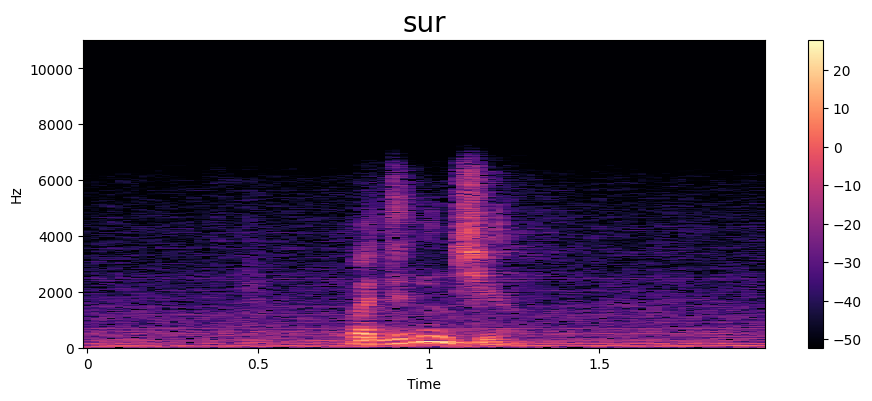

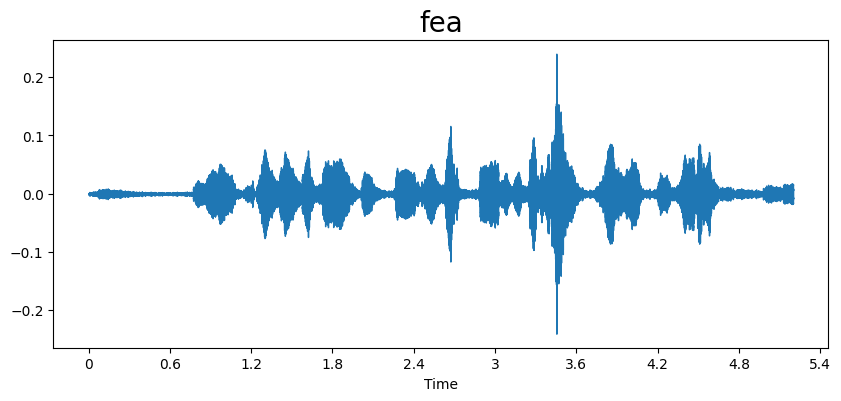

None

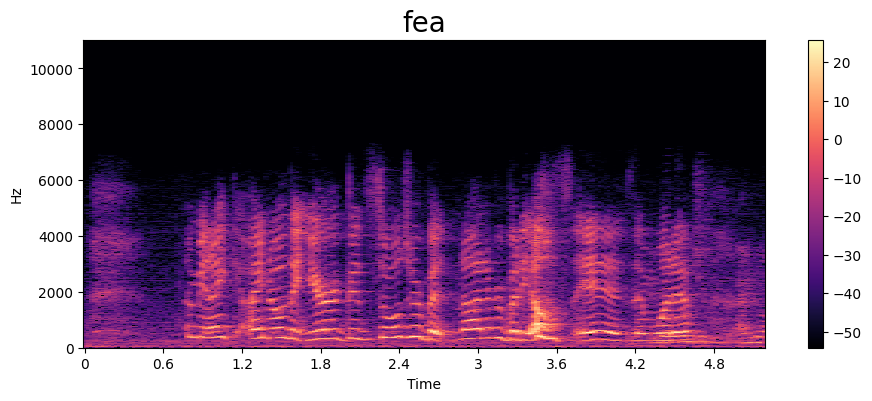

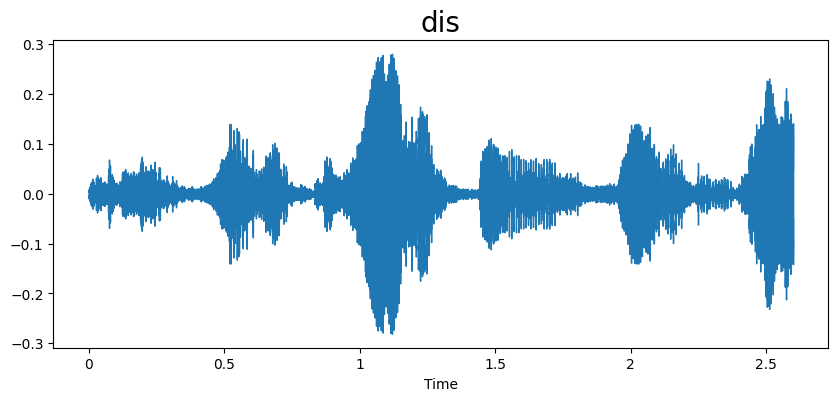

None

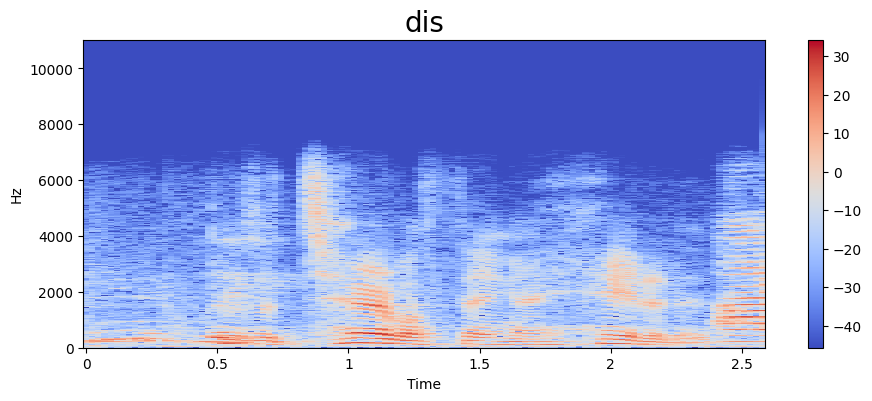

In [15]:
for i in list(filtered_df['emotion'].unique()):
    display(ana_emotion(i, filtered_df))

In [16]:
filtered_df.to_csv('filtered_data.csv', index=False)


In [17]:
from google.colab import files
files.download('filtered_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!pip install librosa
import librosa
import numpy as np

def MFCC(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

mfcc= filtered_df['path'].apply(lambda x:MFCC(x))

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1873
  warnings.warn(


In [19]:
mfcc.shape

(16641,)

In [20]:
X =[x for x in mfcc]
X =np.array(X)
X.shape
X =np.expand_dims(X,-1)
X.shape

(16641, 40, 1)

In [21]:
from sklearn.preprocessing import OneHotEncoder # Import the OneHotEncoder class

ohe=OneHotEncoder()
y = ohe.fit_transform( filtered_df[['emotion']] )
y = y.toarray()

In [22]:
X.shape, y.shape

((16641, 40, 1), (16641, 9))

In [23]:
np.save('all_four_mfcc_imocap', X)

In [24]:
files.download('all_four_mfcc_imocap.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>